<a href="https://colab.research.google.com/github/sbutori/GridWorld/blob/main/gridworld.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar bibliotecas

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import imageio # Para criar imagens .gif com os resultados
import os  # Para remover arquivos de imagem .png após a criação do .gif

# Definir as constantes

In [3]:
EMPTY, MOUNTAIN, QUICKSAND, START, GOAL = range(5) # Tipos de células
ACTIONS = {'up': (-1, 0), 'down': (1, 0), 'left': (0, -1), 'right': (0, 1)} # Ações possíveis

# Definir a classe "GridWorld"

In [9]:
class GridWorld:
    def __init__(self, size=8):
        """Inicializar o gridworld com um tamanho específico."""
        self.size = size  # Tamanho do grid (size x size)
        self.grid = np.zeros((size, size), dtype=int)  # Criar um grid size x size
        self.start = None  # Casa de inicio
        self.goal = None  # Casa de fim

    def set_cell(self, row, col, cell_type):
        """Definir o tipo de célula em uma posição específica."""
        self.grid[row, col] = cell_type  # Tipo da célula
        if cell_type == START:
            self.start = (row, col)  # Posição da célula de início
        elif cell_type == GOAL:
            self.goal = (row, col)  # Posição da célula de fim

    def visualize_grid(self, position, step):
        """Visualizar o gridworld com a posição atual do agente."""
        temp_grid = np.copy(self.grid)
        if self.grid[position] == EMPTY:
            temp_grid[position] = -1  # Marcar temporariamente para visualização
        fig, ax = plt.subplots()
        ax.matshow(temp_grid, cmap='tab20c')
        for (i, j), val in np.ndenumerate(temp_grid):
            text = 'X' if (i, j) == position else f'{val}'
            ax.text(j, i, text, ha='center', va='center', color='black')
        # Salvar a figura como um arquivo de imagem
        plt.savefig(f'quadro_{step}.png')  # Salvar cada quadro como uma imagem
        plt.close(fig)  # Fechar a figura para liberar memória

    def available_actions(self, position):
        """Determinar as ações disponíveis em uma posição específica."""
        actions = []
        for action, (dr, dc) in ACTIONS.items():
            new_r, new_c = position[0] + dr, position[1] + dc
            # Verificar se a nova posição está dentro do grid (não está 'out of bounds')
            if 0 <= new_r < self.size and 0 <= new_c < self.size:
                if self.grid[new_r, new_c] != MOUNTAIN:  # !(ain't no mountain high enough)
                    actions.append(action)
        return actions

    def rewards(self, position, action):
        """Determinar a recompensa de uma ação em uma posição específica."""
        r, c = position  # Obter a posição atual
        dr, dc = ACTIONS[action]  # Obter a mudança na posição
        new_r, new_c = r + dr, c + dc  # Obter a nova posição
        if not (0 <= new_r < self.size and 0 <= new_c < self.size):
            return -1  # Penalizar por sair do grid
        if self.grid[new_r, new_c] == MOUNTAIN:
            return -1  # Penalizar por tentar entrar em uma montanha
        elif self.grid[new_r, new_c] == QUICKSAND:
            return -100  # Enorme penalidade por entrar em areia movediça
        elif self.grid[new_r, new_c] == GOAL:
            return 100  # Enorme recompensa por alcançar o objetivo
        else:
            return -1  # Pequena penalidade por se mover para uma célula vazia

    def agent_logic(self, max_steps=100, delay=0.1):
        """Lógica do agente para navegar no gridworld."""
        if not self.start:
            raise ValueError("Posição de início não definida.")
        if not self.goal:
            raise ValueError("Posição de chegada não definida.")

        position = self.start  # Iniciar na posição de início
        steps = 0  # Contar os passos
        quadros = []  # Lista para armazenar os nomes dos arquivos dos quadros
        for step in range(max_steps):  # Loop até o número máximo de passos
            self.visualize_grid(position, step)  # Visualizar o agente no grid
            quadros.append(f'quadro_{step}.png')  # Adicionar o nome do arquivo do quadro à lista
            actions = self.available_actions(position)
            if not actions:
                print("Sem mais ações disponíveis. Fim de jogo.")
                break

            action = np.random.choice(actions)  # Escolha uma ação aleatória
            reward = self.rewards(position, action)  # Obter a recompensa da ação
            new_r, new_c = position[0] + ACTIONS[action][0], position[1] + ACTIONS[action][1]  # Obter o novo estado

            if reward == -100:  # Agente entrou em areia movediça
                print("Você entrou na areia movediça! Fim de jogo.")
                break
            elif reward == 100:  # Agente alcançou o objetivo
                print("Parabéns, você alcançou a posição de chegada! Fim de jogo.")
                break
            else:
                position = (new_r, new_c)  # Atualizar a posição do agente

            steps += 1  # Incrementar o número de passos

        with imageio.get_writer('gridworld.gif', mode='I', duration=delay) as writer:
            for filename in quadros:
                image = imageio.imread(filename)
                writer.append_data(image)
                os.remove(filename)  # Remover o arquivo .png após adicioná-lo ao .gif para economizar espaço
        print(f"Conseguiu alcançar a chegada?: {reward == 100}, Passos tomados: {steps}")
        return reward == 100, steps

# Executar testes

In [12]:
gridworld = GridWorld()
gridworld.set_cell(0, 0, START)
gridworld.set_cell(7, 7, GOAL)
gridworld.set_cell(2, 2, MOUNTAIN)
gridworld.set_cell(4, 4, MOUNTAIN)
gridworld.set_cell(5, 6, QUICKSAND)
# Executar a lógica do agente com visualização
success, steps_taken = gridworld.agent_logic(delay=2)

<ipython-input-9-9bbcca478916>:93: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


Conseguiu alcançar a chegada?: False, Passos tomados: 100


# Apresentar o resultado

1 - Montanha
2 - Areia Movediça
3 - Partida
4 - Chegada

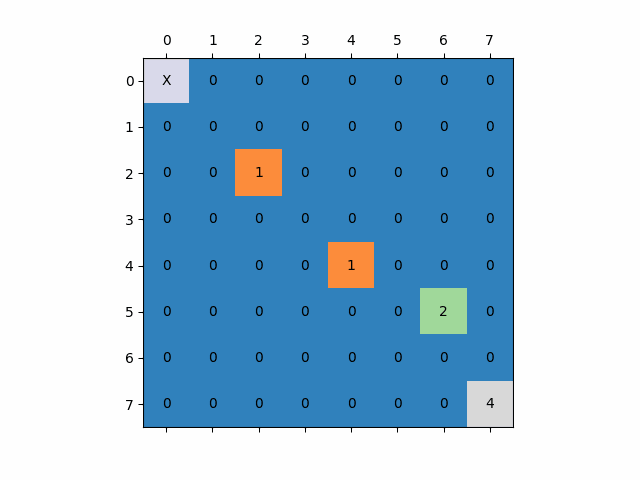

In [14]:
from IPython.display import Image, display

gif_path = 'gridworld.gif'
display(Image(filename=gif_path))